In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data

In [2]:
data = pd.read_csv('delivery_time.csv')
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


## EDA

In [3]:
#shape of data
data.shape

(21, 2)

In [4]:
#Information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


+ No Null-values are present in the data set and the data type is also correct

In [5]:
#Checking for Duplicate value
data[data.duplicated()]

,Delivery Time,Sorting Time


+ No Duplicate values are present

In [6]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


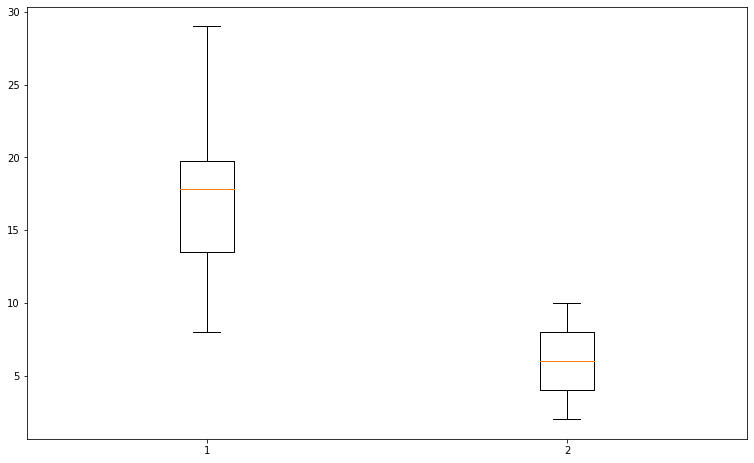

In [7]:
# Outliers Detection
plot_data = [data['Delivery Time'] , data['Sorting Time']]
fig = plt.figure(figsize =(10,6))
axes = fig.add_axes([0, 0, 1, 1])
box_plt = axes.boxplot(plot_data)
plt.show()

+ No Outliers are present

In [8]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


<AxesSubplot:xlabel='Delivery Time', ylabel='Sorting Time'>

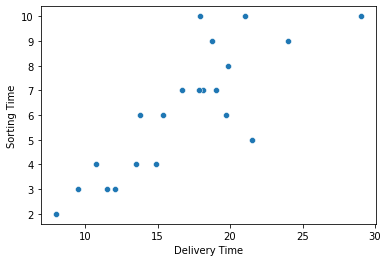

In [9]:
#Correlation b\w parameters
sns.scatterplot(x=data['Delivery Time'],y=data['Sorting Time'])

<AxesSubplot:xlabel='Delivery Time', ylabel='Sorting Time'>

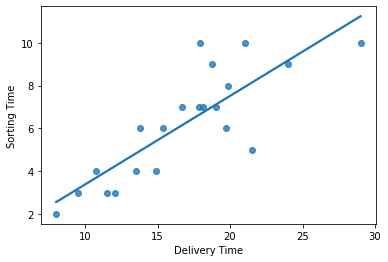

In [10]:
sns.regplot(x='Delivery Time',y='Sorting Time', ci=None ,data=data)

In [11]:
#Correlation
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


+ As we can see that correlation is high. So now we can build Simple Linear Regression Model.

C:\Users\ayush\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

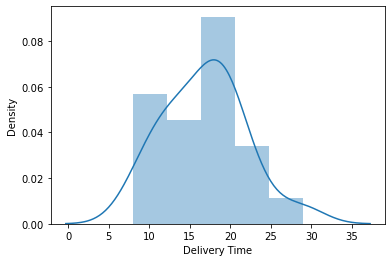

In [12]:
#Distribution
sns.distplot(data['Delivery Time'])

C:\Users\ayush\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

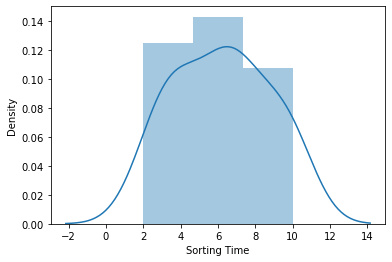

In [13]:
sns.distplot(data['Sorting Time'])

## Model Building

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [15]:
#Split the data into X and y
X = np.array(data['Delivery Time']).reshape(-1,1)
y = np.array(data['Sorting Time']).reshape(-1,1)

In [16]:
#Split the data into Train and Test
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.1 , random_state = 1)


In [17]:
#Model Building
slr = LinearRegression()
slr.fit(X_train,y_train)

LinearRegression()

In [18]:
# R-Squared value
R_value_slr = slr.score(X_train,y_train)
R_value_slr

0.657399341417137

### Predict for Unseen data

In [19]:
y_predict = slr.predict(X_test)
y_predict , y_test

(array([[5.46508253],
        [7.48392928],
        [9.18465472]]),
 array([[4],
        [8],
        [9]], dtype=int64))

### Metric Calculation

In [20]:
#MSE 
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_predict)
mse

0.815631061252903

In [21]:
#RMSE
rmse = np.sqrt(mse)
rmse

0.9031229491342266

### Model Building(With No Training and Testing Data)

In [22]:
#Model Building(With No Training and Testing Data)
model = LinearRegression()
model.fit(X , y)

LinearRegression()

In [23]:
# R-Squared value
R_value_model = model.score(X , y)
R_value_model

0.6822714748417231

In [24]:
print('R-Squared value of two different models')
print("When we don't use Training and Testing data : ",R_value_model)
print("When we use Training and Testing data : ",R_value_slr)

R-Squared value of two different models
When we don't use Training and Testing data :  0.6822714748417231
When we use Training and Testing data :  0.657399341417137
